<a href="https://colab.research.google.com/github/Faareh-Ahmed/Cat_and_Dog_Breed_classsification/blob/main/CatAndDogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"faarehahmed","key":"0ea6e7c3d7bd40520a62713a6f982c7c"}'}

In [10]:
! mkdir ~/kaggledata
! cp kaggle.json ~/kaggledata/
! chmod 600 ~/kaggledata/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/kaggledata’: File exists
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

Dataset URL: https://www.kaggle.com/datasets/zippyz/cats-and-dogs-breeds-classification-oxford-dataset
License(s): CC-BY-SA-4.0
 99% 775M/780M [00:13<00:00, 76.0MB/s]
100% 780M/780M [00:13<00:00, 60.3MB/s]


In [12]:
!unzip cats-and-dogs-breeds-classification-oxford-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/Sphynx_9.jpg  
  inflating: images/images/Sphynx_90.jpg  
  inflating: images/images/Sphynx_91.jpg  
  inflating: images/images/Sphynx_92.jpg  
  inflating: images/images/Sphynx_93.jpg  
  inflating: images/images/Sphynx_94.jpg  
  inflating: images/images/Sphynx_95.jpg  
  inflating: images/images/Sphynx_96.jpg  
  inflating: images/images/Sphynx_98.jpg  
  inflating: images/images/Sphynx_99.jpg  
  inflating: images/images/american_bulldog_10.jpg  
  inflating: images/images/american_bulldog_100.jpg  
  inflating: images/images/american_bulldog_101.jpg  
  inflating: images/images/american_bulldog_102.jpg  
  inflating: images/images/american_bulldog_103.jpg  
  inflating: images/images/american_bulldog_104.jpg  
  inflating: images/images/american_bulldog_105.jpg  
  inflating: images/images/american_bulldog_106.jpg  
  inflating: images/images/american_bulldog_107.jpg  
  inflating: images/images/american

In [13]:
!pwd

/content


# Downloading the Necessary Libraries

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Annotations Folder to get information about the Data

In [15]:
#reading csv
df = pd.read_csv('/content/annotations/annotations/list.txt')

#The first 4 rows consists of the information about breeds
info = df.head(4).copy()

In [16]:
#Reading the data after 5th row
df = df.loc[5:,]

#Processing the columns
df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)

#Dropping unnecessary columns
df = df.drop('#Image CLASS-ID SPECIES BREED ID',axis=1)

#renaming the columns
df = df.rename(columns={"CLASS-ID": "image", "SPECIES": "CLASS-ID", 'BREED' : "SPECIES", "ID":"BREED ID"})


#converting the object type to int type
df[["CLASS-ID","SPECIES","BREED ID"]] = df[["CLASS-ID","SPECIES","BREED ID"]].astype(int)

<ipython-input-16-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)
<ipython-input-16-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)
<ipython-input-16-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [17]:
df

,image,CLASS-ID,SPECIES,BREED ID
5,Abyssinian_100,1,1,1
6,Abyssinian_101,1,1,1
7,Abyssinian_102,1,1,1
8,Abyssinian_103,1,1,1
9,Abyssinian_104,1,1,1
...,...,...,...,...
7349,yorkshire_terrier_96,37,2,25
7350,yorkshire_terrier_97,37,2,25
7351,yorkshire_terrier_98,37,2,25
7352,yorkshire_terrier_99,37,2,25


In [18]:
df['image'] = df['image'].apply(lambda x : str(x)+'.jpg')
df = df.reset_index()
df = df.drop('index',axis=1)

In [19]:
df

,image,CLASS-ID,SPECIES,BREED ID
0,Abyssinian_100.jpg,1,1,1
1,Abyssinian_101.jpg,1,1,1
2,Abyssinian_102.jpg,1,1,1
3,Abyssinian_103.jpg,1,1,1
4,Abyssinian_104.jpg,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96.jpg,37,2,25
7345,yorkshire_terrier_97.jpg,37,2,25
7346,yorkshire_terrier_98.jpg,37,2,25
7347,yorkshire_terrier_99.jpg,37,2,25


In [20]:
#Extracting the classname/breed of the animal
df['classname'] = df['image'].apply(lambda x: str(x)[0:str(x).index('_')])


In [21]:
df

,image,CLASS-ID,SPECIES,BREED ID,classname
0,Abyssinian_100.jpg,1,1,1,Abyssinian
1,Abyssinian_101.jpg,1,1,1,Abyssinian
2,Abyssinian_102.jpg,1,1,1,Abyssinian
3,Abyssinian_103.jpg,1,1,1,Abyssinian
4,Abyssinian_104.jpg,1,1,1,Abyssinian
...,...,...,...,...,...
7344,yorkshire_terrier_96.jpg,37,2,25,yorkshire
7345,yorkshire_terrier_97.jpg,37,2,25,yorkshire
7346,yorkshire_terrier_98.jpg,37,2,25,yorkshire
7347,yorkshire_terrier_99.jpg,37,2,25,yorkshire


# Visualizing the Species

In [23]:
def breed_count(df, title):
    breed_count  = df['classname'].value_counts()

    plt.figure(figsize=(20,5))
    sns.barplot(x=breed_count.index, y=breed_count.values, alpha=0.8)
    plt.title('Value count of number of ' + title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Breed Names', fontsize=10)
    plt.xticks(rotation=90)
    plt.show()


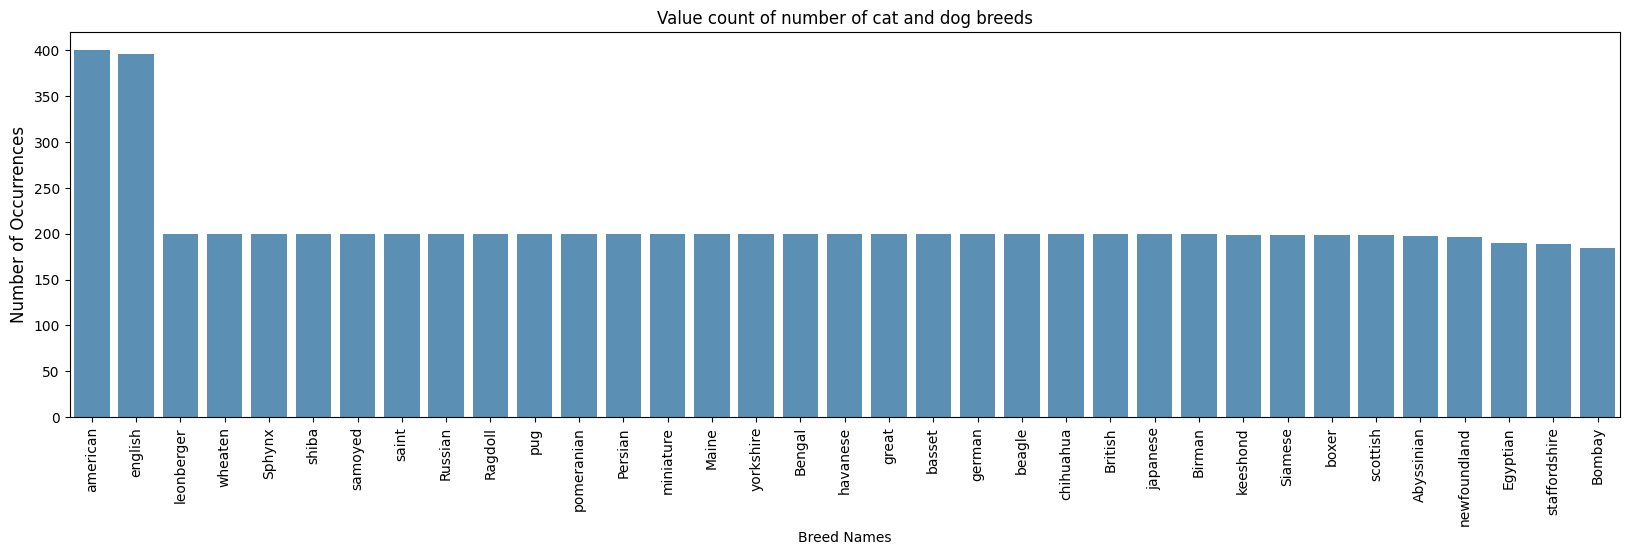

In [24]:
breed_count(df, "cat and dog breeds")


# Separating Cats and Dogs Specie

In [26]:
df_cat = df[df['SPECIES']==1] #cat : 1
df_dog = df[df['SPECIES']==2] #dog : 2
print("Number of samples in df_cat ",df_cat.shape[0])
print("Number of samples in df_dog ",df_dog.shape[0])

Number of samples in df_cat  2371
Number of samples in df_dog  4978


# Cat Species

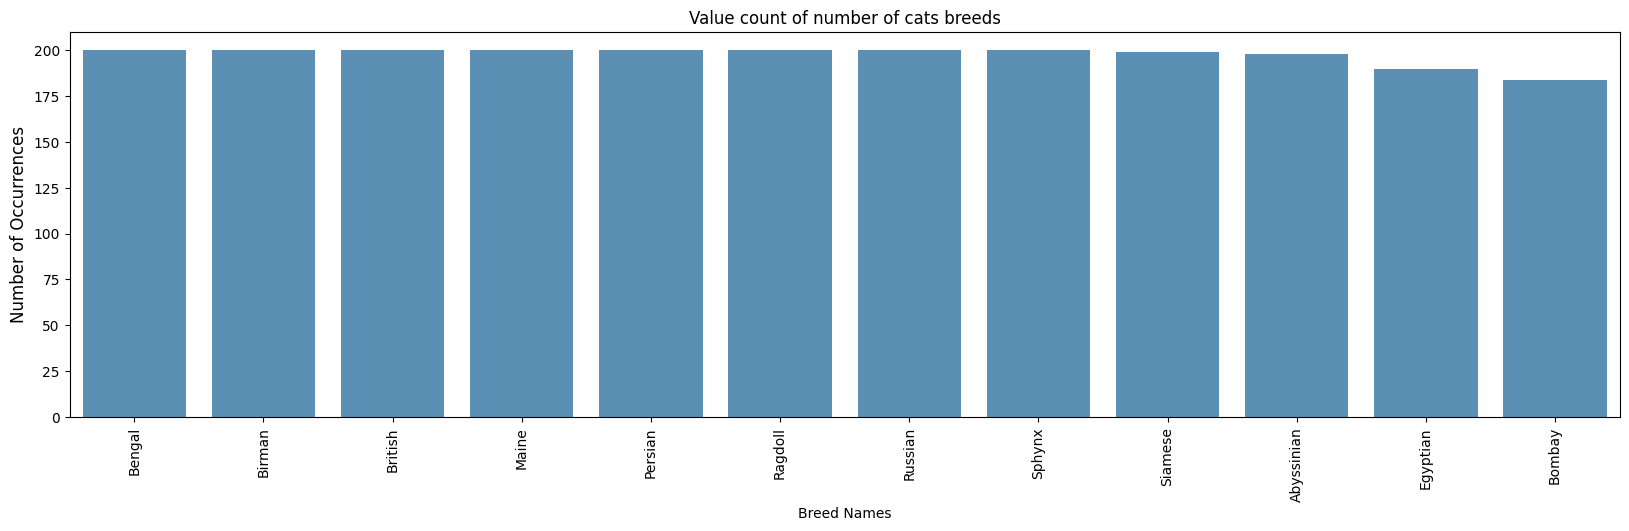

In [27]:
breed_count(df_cat, "cats breeds")

# Dog Species

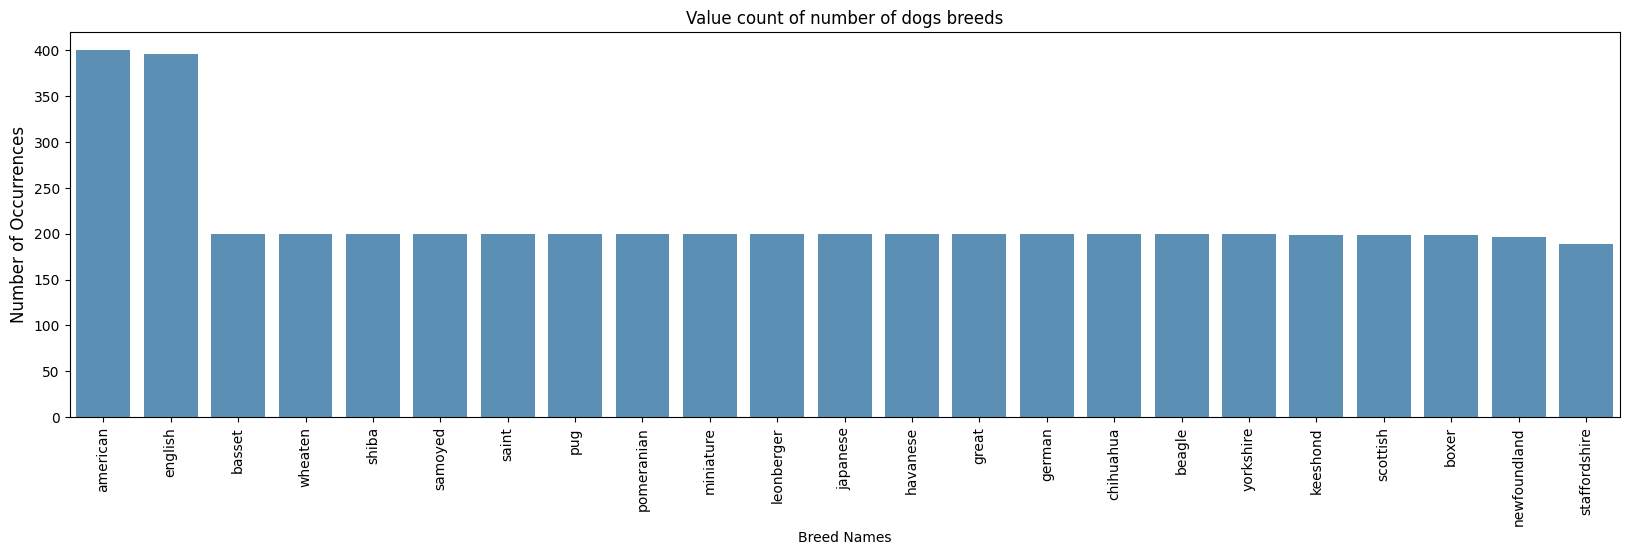

In [28]:
breed_count(df_dog, "dogs breeds")

# Generators


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/images',
    # labels=None,
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 7390 files belonging to 1 classes.
